In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

In [ ]:
ratings=pd.read_csv('ratings data.csv')

In [ ]:
movies=pd.read_csv('movies data.csv') 

In [ ]:
movies = movies.drop('Unnamed: 0',axis = 1)
ratings= ratings.drop(['Unnamed: 0','Timestamp'],axis = 1)

In [ ]:
ratings

,UserID,MovieID,Rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5
...,...,...,...
1000204,6040,1091,1
1000205,6040,1094,5
1000206,6040,562,5
1000207,6040,1096,4


In [ ]:
movies

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [ ]:
x = movies.Genres
a = list()
for i in x:
    abc = i
    a.append(abc.split('|'))
a = pd.DataFrame(a)   
b = a[0].unique()
for i in b:
    movies[i] = 0
movies.head(10)

,MovieID,Title,Genres,Animation,Adventure,Comedy,Action,Drama,Thriller,Crime,...,Children's,Documentary,Sci-Fi,Horror,Western,Mystery,Film-Noir,War,Fantasy,Musical
0,1,Toy Story (1995),Animation|Children's|Comedy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,Heat (1995),Action|Crime|Thriller,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Sabrina (1995),Comedy|Romance,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,8,Tom and Huck (1995),Adventure|Children's,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,Sudden Death (1995),Action,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,GoldenEye (1995),Action|Adventure|Thriller,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
for i in b:
    movies.loc[movies['Genres'].str.contains(i), i] = 1

In [ ]:
movies.head(10)

,MovieID,Title,Genres,Animation,Adventure,Comedy,Action,Drama,Thriller,Crime,...,Children's,Documentary,Sci-Fi,Horror,Western,Mystery,Film-Noir,War,Fantasy,Musical
0,1,Toy Story (1995),Animation|Children's|Comedy,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,Heat (1995),Action|Crime|Thriller,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
6,7,Sabrina (1995),Comedy|Romance,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,8,Tom and Huck (1995),Adventure|Children's,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8,9,Sudden Death (1995),Action,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,GoldenEye (1995),Action|Adventure|Thriller,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
movies = movies.drop(['Genres','Title'],axis =1)
movies.head(10)

,MovieID,Animation,Adventure,Comedy,Action,Drama,Thriller,Crime,Romance,Children's,Documentary,Sci-Fi,Horror,Western,Mystery,Film-Noir,War,Fantasy,Musical
0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,3,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,4,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,6,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
6,7,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7,8,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8,9,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,10,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
movies.shape

(3883, 19)

In [ ]:
genres=movies.iloc[:,-18:]
genres

,Animation,Adventure,Comedy,Action,Drama,Thriller,Crime,Romance,Children's,Documentary,Sci-Fi,Horror,Western,Mystery,Film-Noir,War,Fantasy,Musical
0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3879,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3880,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3881,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
pca = PCA(n_components=15, svd_solver='full')
pca.fit_transform(genres)

array([[ 0.81202012, -0.36496704, -0.12758158, ...,  0.00205465,
         0.05965679, -0.50023153],
       [ 0.27509115,  0.44891321,  0.05331528, ...,  0.06289631,
        -0.09209782,  0.67627531],
       [ 0.72331374, -0.58258341,  0.28934753, ..., -0.00297698,
        -0.02409473, -0.01856759],
       ...,
       [-0.6791239 , -0.16170431, -0.07655525, ...,  0.01061567,
        -0.05162946, -0.00298263],
       [-0.6791239 , -0.16170431, -0.07655525, ...,  0.01061567,
        -0.05162946, -0.00298263],
       [-0.67112421,  0.20593233, -0.09959345, ..., -0.13979505,
         0.00558342,  0.00126185]])

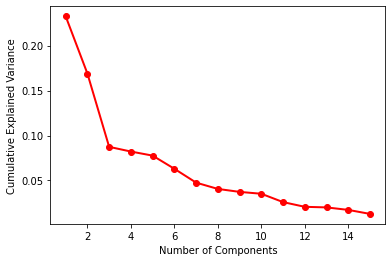

In [ ]:
explain_ratio=pca.explained_variance_ratio_
PC_values = np.arange(pca.n_components_) + 1
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)

In [ ]:
pcaf = PCA(n_components=12, svd_solver='full')
pcaf=pcaf.fit_transform(genres)
pcaf

array([[ 0.81202012, -0.36496704, -0.12758158, ...,  0.6522052 ,
        -0.02561875, -0.23200686],
       [ 0.27509115,  0.44891321,  0.05331528, ..., -0.37147345,
         0.04461159, -0.31412242],
       [ 0.72331374, -0.58258341,  0.28934753, ...,  0.01782991,
        -0.0209049 , -0.04250546],
       ...,
       [-0.6791239 , -0.16170431, -0.07655525, ..., -0.02951078,
        -0.04856513,  0.01702096],
       [-0.6791239 , -0.16170431, -0.07655525, ..., -0.02951078,
        -0.04856513,  0.01702096],
       [-0.67112421,  0.20593233, -0.09959345, ..., -0.07739198,
        -0.01637309, -0.01754208]])

In [ ]:
df = pd.DataFrame(pcaf, columns = ['G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'])
df

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,G12
0,0.812020,-0.364967,-0.127582,-0.513908,0.026665,0.741039,0.057535,0.314549,-0.178458,0.652205,-0.025619,-0.232007
1,0.275091,0.448913,0.053315,-0.861270,0.468686,0.850144,0.277245,0.335978,0.209272,-0.371473,0.044612,-0.314122
2,0.723314,-0.582583,0.289348,0.467526,0.556694,-0.061750,0.012248,-0.010072,0.026987,0.017830,-0.020905,-0.042505
3,-0.100269,-0.804616,0.104004,-0.031621,-0.400859,-0.069288,0.197481,0.097095,-0.014610,-0.011028,-0.035142,-0.016555
4,0.699861,-0.407688,-0.053783,-0.023095,-0.207500,-0.035222,-0.042632,-0.076503,-0.023641,-0.068949,-0.000849,0.016239
...,...,...,...,...,...,...,...,...,...,...,...,...
3878,0.699861,-0.407688,-0.053783,-0.023095,-0.207500,-0.035222,-0.042632,-0.076503,-0.023641,-0.068949,-0.000849,0.016239
3879,-0.679124,-0.161704,-0.076555,-0.104179,-0.059690,-0.012242,0.000656,-0.034810,-0.035348,-0.029511,-0.048565,0.017021
3880,-0.679124,-0.161704,-0.076555,-0.104179,-0.059690,-0.012242,0.000656,-0.034810,-0.035348,-0.029511,-0.048565,0.017021
3881,-0.679124,-0.161704,-0.076555,-0.104179,-0.059690,-0.012242,0.000656,-0.034810,-0.035348,-0.029511,-0.048565,0.017021


In [ ]:
data1=movies.iloc[: , :1]
data1

,MovieID
0,1
1,2
2,3
3,4
4,5
...,...
3878,3948
3879,3949
3880,3950
3881,3951


In [ ]:
frames=[data1, df]
result = pd.concat(frames, axis=1)
result

,MovieID,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,G12
0,1,0.812020,-0.364967,-0.127582,-0.513908,0.026665,0.741039,0.057535,0.314549,-0.178458,0.652205,-0.025619,-0.232007
1,2,0.275091,0.448913,0.053315,-0.861270,0.468686,0.850144,0.277245,0.335978,0.209272,-0.371473,0.044612,-0.314122
2,3,0.723314,-0.582583,0.289348,0.467526,0.556694,-0.061750,0.012248,-0.010072,0.026987,0.017830,-0.020905,-0.042505
3,4,-0.100269,-0.804616,0.104004,-0.031621,-0.400859,-0.069288,0.197481,0.097095,-0.014610,-0.011028,-0.035142,-0.016555
4,5,0.699861,-0.407688,-0.053783,-0.023095,-0.207500,-0.035222,-0.042632,-0.076503,-0.023641,-0.068949,-0.000849,0.016239
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,0.699861,-0.407688,-0.053783,-0.023095,-0.207500,-0.035222,-0.042632,-0.076503,-0.023641,-0.068949,-0.000849,0.016239
3879,3949,-0.679124,-0.161704,-0.076555,-0.104179,-0.059690,-0.012242,0.000656,-0.034810,-0.035348,-0.029511,-0.048565,0.017021
3880,3950,-0.679124,-0.161704,-0.076555,-0.104179,-0.059690,-0.012242,0.000656,-0.034810,-0.035348,-0.029511,-0.048565,0.017021
3881,3951,-0.679124,-0.161704,-0.076555,-0.104179,-0.059690,-0.012242,0.000656,-0.034810,-0.035348,-0.029511,-0.048565,0.017021


In [ ]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 13)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(df)
    kmeanModel.fit(df)
    distortions.append(sum(np.min(cdist(df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])
    inertias.append(kmeanModel.inertia_)
    mapping1[k] = sum(np.min(cdist( df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0]
    mapping2[k] = kmeanModel.inertia_

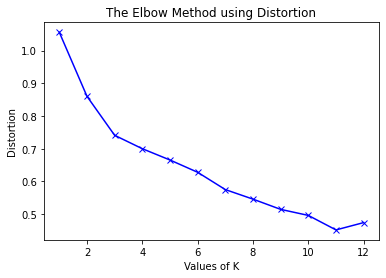

In [ ]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
clustered=kmeans.fit_transform(df)

In [ ]:
clustered

array([[1.87370879, 1.85330195, 1.25004009, 1.15722001, 1.97177622,
        1.70156763],
       [1.85912964, 1.84351804, 1.80772333, 0.70020968, 1.7342597 ,
        1.62087723],
       [1.67264212, 1.58250105, 0.82222564, 1.67097903, 1.74917374,
        1.41834298],
       ...,
       [1.43096141, 0.20784395, 1.42906982, 1.45353242, 1.48219976,
        1.11200814],
       [1.43096141, 0.20784395, 1.42906982, 1.45353242, 1.48219976,
        1.11200814],
       [1.6441351 , 0.95533295, 1.72138305, 1.75844025, 1.57689151,
        1.22228557]])

In [ ]:
result['Cluster'] = kmeans.labels_
display(result)

,MovieID,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,G12,Cluster
0,1,0.812020,-0.364967,-0.127582,-0.513908,0.026665,0.741039,0.057535,0.314549,-0.178458,0.652205,-0.025619,-0.232007,3
1,2,0.275091,0.448913,0.053315,-0.861270,0.468686,0.850144,0.277245,0.335978,0.209272,-0.371473,0.044612,-0.314122,3
2,3,0.723314,-0.582583,0.289348,0.467526,0.556694,-0.061750,0.012248,-0.010072,0.026987,0.017830,-0.020905,-0.042505,2
3,4,-0.100269,-0.804616,0.104004,-0.031621,-0.400859,-0.069288,0.197481,0.097095,-0.014610,-0.011028,-0.035142,-0.016555,1
4,5,0.699861,-0.407688,-0.053783,-0.023095,-0.207500,-0.035222,-0.042632,-0.076503,-0.023641,-0.068949,-0.000849,0.016239,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,0.699861,-0.407688,-0.053783,-0.023095,-0.207500,-0.035222,-0.042632,-0.076503,-0.023641,-0.068949,-0.000849,0.016239,2
3879,3949,-0.679124,-0.161704,-0.076555,-0.104179,-0.059690,-0.012242,0.000656,-0.034810,-0.035348,-0.029511,-0.048565,0.017021,1
3880,3950,-0.679124,-0.161704,-0.076555,-0.104179,-0.059690,-0.012242,0.000656,-0.034810,-0.035348,-0.029511,-0.048565,0.017021,1
3881,3951,-0.679124,-0.161704,-0.076555,-0.104179,-0.059690,-0.012242,0.000656,-0.034810,-0.035348,-0.029511,-0.048565,0.017021,1


In [ ]:
result['Cluster'].value_counts()

1    1566
2     885
5     521
4     384
0     312
3     215
Name: Cluster, dtype: int64

In [ ]:
movie_cluster=result[['MovieID', 'Cluster']]
movie_cluster

,MovieID,Cluster
0,1,3
1,2,3
2,3,2
3,4,1
4,5,2
...,...,...
3878,3948,2
3879,3949,1
3880,3950,1
3881,3951,1


In [ ]:
table = pd.pivot_table(ratings, values='Rating', index='UserID', columns=['MovieID'])
table

MovieID,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
UserID,,,,,,,,,,,,,,,,,,,,,
1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,NaN,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
user_movie_cluster=pd.merge(left = ratings, right = movie_cluster, how = 'left')
user_movie_cluster

,UserID,MovieID,Rating,Cluster
0,1,1193,5,1
1,1,661,3,3
2,1,914,3,5
3,1,3408,4,1
4,1,2355,5,3
...,...,...,...,...
1000204,6040,1091,1,2
1000205,6040,1094,5,1
1000206,6040,562,5,1
1000207,6040,1096,4,1


In [ ]:
usc=user_movie_cluster.groupby(['UserID', 'Cluster'])['Rating'].mean()
usc=usc.to_frame()
usc

Rating
UserID Cluster          
1      1        4.444444
       2        4.000000
       3        4.222222
       4        4.000000
       5        3.666667
...                  ...
6040   1        3.843575
       2        3.106061
       3        3.714286
       4        2.833333
       5        4.256410

[33923 rows x 1 columns]

In [ ]:
usc=usc.unstack()
usc

Rating                                                  
Cluster         0         1         2         3         4         5
UserID                                                             
1             NaN  4.444444  4.000000  4.222222  4.000000  3.666667
2        3.000000  3.906667  3.400000       NaN  3.465116       NaN
3             NaN  4.000000  3.736842  4.000000  3.894737  4.666667
4        5.000000  4.750000       NaN  4.000000  4.000000       NaN
5        2.666667  3.087379  3.457143  4.200000  2.625000  3.454545
...           ...       ...       ...       ...       ...       ...
6036     3.000000  3.505464  3.147059  3.384615  2.895522  3.495327
6037     4.000000  3.863158  3.485714  4.000000  3.565217  3.578947
6038     2.500000  3.888889  4.000000       NaN  4.000000       NaN
6039     4.000000  4.000000  3.693878  3.625000  4.250000  4.185185
6040     2.500000  3.843575  3.106061  3.714286  2.833333  4.256410

[6040 rows x 6 columns]

In [ ]:
usc.isnull().sum()
#6

        Cluster
Rating  0          966
        1            3
        2           75
        3          741
        4           99
        5          433
dtype: int64

In [ ]:
usc=usc.fillna(0)
usc

Rating                                                  
Cluster         0         1         2         3         4         5
UserID                                                             
1        0.000000  4.444444  4.000000  4.222222  4.000000  3.666667
2        3.000000  3.906667  3.400000  0.000000  3.465116  0.000000
3        0.000000  4.000000  3.736842  4.000000  3.894737  4.666667
4        5.000000  4.750000  0.000000  4.000000  4.000000  0.000000
5        2.666667  3.087379  3.457143  4.200000  2.625000  3.454545
...           ...       ...       ...       ...       ...       ...
6036     3.000000  3.505464  3.147059  3.384615  2.895522  3.495327
6037     4.000000  3.863158  3.485714  4.000000  3.565217  3.578947
6038     2.500000  3.888889  4.000000  0.000000  4.000000  0.000000
6039     4.000000  4.000000  3.693878  3.625000  4.250000  4.185185
6040     2.500000  3.843575  3.106061  3.714286  2.833333  4.256410

[6040 rows x 6 columns]

In [ ]:
table=table.replace(' NaN', np.NaN)

In [ ]:
table1=table

In [ ]:
usc1=usc

In [ ]:
table1=table1.unstack().reset_index()
table1=table1.rename(columns = {list(table1)[2]:'Rating'})
table1

,MovieID,UserID,Rating
0,1,1,5.0
1,1,2,NaN
2,1,3,NaN
3,1,4,NaN
4,1,5,NaN
...,...,...,...
22384235,3952,6036,NaN
22384236,3952,6037,NaN
22384237,3952,6038,NaN
22384238,3952,6039,NaN


In [ ]:
usc1=usc1.unstack().reset_index()
usc1=usc1.rename(columns = {list(usc1)[3]:'Average'})
usc1=usc1.drop(['level_0'], axis=1)
usc1

,Cluster,UserID,Average
0,0,1,0.000000
1,0,2,3.000000
2,0,3,0.000000
3,0,4,5.000000
4,0,5,2.666667
...,...,...,...
36235,5,6036,3.495327
36236,5,6037,3.578947
36237,5,6038,0.000000
36238,5,6039,4.185185


In [ ]:
table3=pd.merge(left = table1, right = movie_cluster, how = 'left', on='MovieID')
table3

,MovieID,UserID,Rating,Cluster
0,1,1,5.0,3
1,1,2,NaN,3
2,1,3,NaN,3
3,1,4,NaN,3
4,1,5,NaN,3
...,...,...,...,...
22384235,3952,6036,NaN,1
22384236,3952,6037,NaN,1
22384237,3952,6038,NaN,1
22384238,3952,6039,NaN,1


In [ ]:
table4=pd.merge(left = table3, right = usc1, how = 'left', on=['Cluster', 'UserID'])
table4 = table4.sort_values(by=['UserID', 'MovieID'], ascending=True)

In [ ]:
table4

,MovieID,UserID,Rating,Cluster,Average
0,1,1,5.0,3,4.222222
6040,2,1,NaN,3,4.222222
12080,3,1,NaN,2,4.000000
18120,4,1,NaN,1,4.444444
24160,5,1,NaN,2,4.000000
...,...,...,...,...,...
22360079,3948,6040,NaN,2,3.106061
22366119,3949,6040,NaN,1,3.843575
22372159,3950,6040,NaN,1,3.843575
22378199,3951,6040,NaN,1,3.843575


In [ ]:
table4['Rating']=table4['Rating'].fillna(table4['Average'])
table4

,MovieID,UserID,Rating,Cluster,Average
0,1,1,5.000000,3,4.222222
6040,2,1,4.222222,3,4.222222
12080,3,1,4.000000,2,4.000000
18120,4,1,4.444444,1,4.444444
24160,5,1,4.000000,2,4.000000
...,...,...,...,...,...
22360079,3948,6040,3.106061,2,3.106061
22366119,3949,6040,3.843575,1,3.843575
22372159,3950,6040,3.843575,1,3.843575
22378199,3951,6040,3.843575,1,3.843575


In [ ]:
result=table4.drop(['Cluster', 'Average'], axis=1)
result

,MovieID,UserID,Rating
0,1,1,5.000000
6040,2,1,4.222222
12080,3,1,4.000000
18120,4,1,4.444444
24160,5,1,4.000000
...,...,...,...
22360079,3948,6040,3.106061
22366119,3949,6040,3.843575
22372159,3950,6040,3.843575
22378199,3951,6040,3.843575


In [ ]:
table_cluster = pd.pivot_table(result, values='Rating', index='UserID', columns=['MovieID'])
table_cluster

MovieID,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
UserID,,,,,,,,,,,,,,,,,,,,,
1,5.000000,4.222222,4.000000,4.444444,4.000000,4.000000,4.000000,4.222222,4.000000,4.000000,...,4.000000,4.444444,4.222222,4.000000,3.666667,4.000000,4.444444,4.444444,4.444444,4.444444
2,0.000000,0.000000,3.400000,3.906667,3.400000,3.465116,3.400000,0.000000,3.465116,3.465116,...,3.400000,3.906667,0.000000,3.465116,0.000000,3.400000,3.906667,3.906667,3.906667,3.906667
3,4.000000,4.000000,3.736842,4.000000,3.736842,3.894737,3.736842,4.000000,3.894737,3.894737,...,3.736842,4.000000,4.000000,3.894737,4.666667,3.736842,4.000000,4.000000,4.000000,4.000000
4,4.000000,4.000000,0.000000,4.750000,0.000000,4.000000,0.000000,4.000000,4.000000,4.000000,...,0.000000,4.750000,4.000000,4.000000,0.000000,0.000000,4.750000,4.750000,4.750000,4.750000
5,4.200000,4.200000,3.457143,3.087379,3.457143,2.000000,3.457143,4.200000,2.625000,2.625000,...,3.457143,3.087379,4.200000,2.625000,3.454545,3.457143,3.087379,3.087379,3.087379,3.087379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,3.384615,3.384615,3.147059,2.000000,3.147059,3.000000,3.147059,3.384615,2.895522,2.895522,...,3.147059,3.505464,3.384615,2.895522,3.495327,3.147059,3.505464,3.505464,3.505464,3.505464
6037,4.000000,4.000000,3.485714,3.863158,3.485714,3.565217,3.485714,4.000000,3.565217,3.565217,...,3.485714,3.863158,4.000000,3.565217,3.578947,3.485714,3.863158,3.863158,3.863158,3.863158
6038,0.000000,0.000000,4.000000,3.888889,4.000000,4.000000,4.000000,0.000000,4.000000,4.000000,...,4.000000,3.888889,0.000000,4.000000,0.000000,4.000000,3.888889,3.888889,3.888889,3.888889


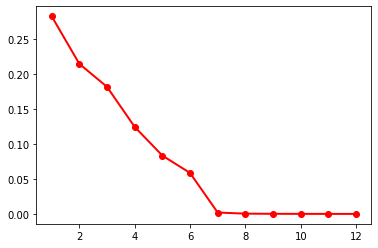

In [ ]:
svd = TruncatedSVD(n_components=12, random_state=42)
svd.fit(table_cluster)
SVD_values = np.arange(svd.n_components) + 1
plt.plot(SVD_values, svd.explained_variance_ratio_, 'ro-', linewidth=2)

In [ ]:
svd = TruncatedSVD(n_components=7, random_state=42)
X_transformed=svd.fit_transform(table_cluster)
U = X_transformed / svd.singular_values_
Sigma_matrix = np.diag(svd.singular_values_)
VT = svd.components_
X_pred = np.dot(np.dot(U, Sigma_matrix), VT)
X_pred

array([[ 4.30333201,  4.23173931,  3.99093297, ...,  4.44552003,
         4.44705842,  4.44666145],
       [ 0.10815625, -0.00602113,  3.39565461, ...,  3.90377119,
         3.90248754,  3.90907519],
       [ 4.09478533,  4.0041424 ,  3.71652245, ...,  4.00083498,
         4.00403577,  4.00246711],
       ...,
       [ 0.03400566,  0.0240422 ,  4.01274469, ...,  3.88591314,
         3.88509915,  3.88695718],
       [ 3.70878534,  3.62199786,  3.68373701, ...,  3.9987088 ,
         4.00294303,  3.9958321 ],
       [ 3.98598305,  3.65203782,  3.05439548, ...,  3.84343879,
         3.84634687,  3.84798302]])

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten()
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

In [ ]:
table_svd=table.apply(lambda row: row.fillna(row.mean()), axis=1)
table_svd

MovieID,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
UserID,,,,,,,,,,,,,,,,,,,,,
1,5.000000,4.188679,4.188679,4.188679,4.188679,4.188679,4.188679,4.188679,4.188679,4.188679,...,4.188679,4.188679,4.188679,4.188679,4.188679,4.188679,4.188679,4.188679,4.188679,4.188679
2,3.713178,3.713178,3.713178,3.713178,3.713178,3.713178,3.713178,3.713178,3.713178,3.713178,...,3.713178,3.713178,3.713178,3.713178,3.713178,3.713178,3.713178,3.713178,3.713178,3.713178
3,3.901961,3.901961,3.901961,3.901961,3.901961,3.901961,3.901961,3.901961,3.901961,3.901961,...,3.901961,3.901961,3.901961,3.901961,3.901961,3.901961,3.901961,3.901961,3.901961,3.901961
4,4.190476,4.190476,4.190476,4.190476,4.190476,4.190476,4.190476,4.190476,4.190476,4.190476,...,4.190476,4.190476,4.190476,4.190476,4.190476,4.190476,4.190476,4.190476,4.190476,4.190476
5,3.146465,3.146465,3.146465,3.146465,3.146465,2.000000,3.146465,3.146465,3.146465,3.146465,...,3.146465,3.146465,3.146465,3.146465,3.146465,3.146465,3.146465,3.146465,3.146465,3.146465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,3.302928,3.302928,3.302928,2.000000,3.302928,3.000000,3.302928,3.302928,3.302928,3.302928,...,3.302928,3.302928,3.302928,3.302928,3.302928,3.302928,3.302928,3.302928,3.302928,3.302928
6037,3.717822,3.717822,3.717822,3.717822,3.717822,3.717822,3.717822,3.717822,3.717822,3.717822,...,3.717822,3.717822,3.717822,3.717822,3.717822,3.717822,3.717822,3.717822,3.717822,3.717822
6038,3.800000,3.800000,3.800000,3.800000,3.800000,3.800000,3.800000,3.800000,3.800000,3.800000,...,3.800000,3.800000,3.800000,3.800000,3.800000,3.800000,3.800000,3.800000,3.800000,3.800000


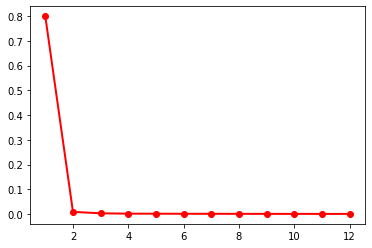

In [ ]:
svd1 = TruncatedSVD(n_components=12, random_state=42)
svd1.fit(table_svd)
SVD_values1 = np.arange(svd1.n_components) + 1
plt.plot(SVD_values1, svd1.explained_variance_ratio_, 'ro-', linewidth=2)

In [ ]:
svd1 = TruncatedSVD(n_components=2, random_state=42)
X_transformed1=svd1.fit_transform(table_svd)
U = X_transformed1 / svd1.singular_values_
Sigma_matrix = np.diag(svd1.singular_values_)
VT = svd1.components_
X_pred1 = np.dot(np.dot(U, Sigma_matrix), VT)
X_pred1

array([[4.2401651 , 4.18364057, 4.1842215 , ..., 4.18729675, 4.19114856,
        4.1849719 ],
       [3.84850047, 3.68293755, 3.68583439, ..., 3.71334291, 3.71557115,
        3.72009322],
       [3.96461146, 3.89304672, 3.89397798, ..., 3.90090161, 3.90429546,
        3.90017901],
       ...,
       [3.82737395, 3.80101851, 3.80103134, ..., 3.79847125, 3.80222175,
        3.79445995],
       [3.95147775, 3.86599338, 3.86721514, ..., 3.87717831, 3.88040384,
        3.8775559 ],
       [3.85669976, 3.50565306, 3.5123954 , ..., 3.58001122, 3.58019008,
        3.60113215]])

In [ ]:
#np.round_(X_pred1,decimals=2)

In [ ]:
rmse(X_pred,X_pred1)

0.8378993043380515

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances
user_similarity = pairwise_distances(table_cluster, metric='cosine')
item_similarity = pairwise_distances(table_cluster.T, metric='cosine')

In [ ]:
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        #You use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [ ]:
item_prediction = predict(table_cluster, item_similarity, type='item')
user_prediction = predict(table_cluster, user_similarity, type='user')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


In [ ]:
user_similarity1 = pairwise_distances(table_svd, metric='cosine')
item_similarity1 = pairwise_distances(table_svd.T, metric='cosine')

In [ ]:
item_prediction1 = predict(table_svd, item_similarity1, type='item')
user_prediction1 = predict(table_svd, user_similarity1, type='user')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


In [ ]:
print('User-based CF RMSE: ' + str(rmse(user_prediction,user_prediction1)))
print('Item-based CF RMSE: ' + str(rmse(item_prediction.values,item_prediction1.values)))

User-based CF RMSE: 0.6176913268866155
Item-based CF RMSE: 0.69320596569871


In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(item_prediction1,item_prediction)

0.42713860414963445

In [ ]:
mean_absolute_error(X_pred1,X_pred)

0.4242918275125544

In [ ]:
#clustered
item_prediction

,0,1,2,3,4,5,6,7,8,9,...,3696,3697,3698,3699,3700,3701,3702,3703,3704,3705
UserID,,,,,,,,,,,,,,,,,,,,,
1,3.556798,3.535606,2.922797,2.651491,2.876581,3.163621,2.883432,3.528074,3.094739,3.139884,...,2.852978,2.599827,3.530740,3.106250,3.384711,2.966886,2.674015,2.604325,2.600304,2.661630
2,2.982667,2.983198,2.196068,1.963165,2.165448,2.351124,2.178805,2.987836,2.285005,2.324801,...,2.146269,1.921862,2.987064,2.297740,3.118834,2.226216,1.980363,1.926843,1.924232,1.974988
3,3.477992,3.460614,2.989834,2.774309,2.951381,3.173806,2.954890,3.454478,3.121270,3.157531,...,2.932756,2.733467,3.456766,3.129571,3.138342,3.025353,2.792332,2.736781,2.733301,2.781564
4,2.908406,2.909594,3.453162,2.855543,3.484128,2.871590,3.474262,2.907312,2.871194,2.870330,...,3.496906,2.848684,2.906360,2.873863,3.515357,3.415767,2.848835,2.848865,2.849763,2.847905
5,3.127302,3.122657,3.168645,3.229445,3.166323,3.259374,3.166239,3.119368,3.266300,3.262292,...,3.165282,3.230423,3.120212,3.265019,3.159143,3.172774,3.228891,3.230052,3.230103,3.229365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,3.288697,3.288697,3.272595,3.207915,3.270412,3.295040,3.269733,3.287371,3.297924,3.298344,...,3.268457,3.202174,3.287596,3.298042,3.237910,3.274050,3.206861,3.202323,3.201978,3.207390
6037,3.724260,3.724777,3.817842,3.784042,3.822750,3.778050,3.821341,3.724210,3.784958,3.780984,...,3.824867,3.786041,3.724150,3.784108,3.782373,3.812963,3.781764,3.785715,3.786015,3.782701
6038,3.094182,3.091099,2.122261,1.935478,2.080516,2.356654,2.097128,3.095363,2.272177,2.321987,...,2.056113,1.887468,3.095059,2.287462,3.214905,2.163602,1.958220,1.893348,1.890053,1.950298


In [ ]:
#rowmean
item_prediction1

,0,1,2,3,4,5,6,7,8,9,...,3696,3697,3698,3699,3700,3701,3702,3703,3704,3705
UserID,,,,,,,,,,,,,,,,,,,,,
1,4.188636,4.189712,4.189699,4.190523,4.190303,4.189392,4.190002,4.191418,4.190979,4.189700,...,4.190883,4.191702,4.190759,4.190398,4.191319,4.189419,4.189901,4.191284,4.191474,4.190078
2,3.713925,3.718339,3.718571,3.722109,3.720971,3.716003,3.719903,3.726141,3.724362,3.718036,...,3.722951,3.727134,3.722556,3.721466,3.725452,3.716654,3.718649,3.725452,3.726346,3.719499
3,3.901920,3.902468,3.902276,3.902528,3.902468,3.901868,3.902286,3.902636,3.902758,3.902145,...,3.902441,3.902730,3.902597,3.902410,3.902660,3.902105,3.902281,3.902530,3.902672,3.902297
4,4.190094,4.189824,4.189557,4.189072,4.189193,4.189812,4.189470,4.188307,4.188744,4.189750,...,4.188840,4.188082,4.188842,4.189127,4.188327,4.189846,4.189363,4.188362,4.188212,4.189316
5,3.148400,3.153492,3.153493,3.158328,3.156986,3.151150,3.155771,3.162965,3.160520,3.153709,...,3.158947,3.164702,3.158233,3.157241,3.162303,3.151224,3.152269,3.162993,3.163496,3.155080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,3.298743,3.319141,3.317976,3.325920,3.324410,3.304962,3.320328,3.330455,3.331511,3.314987,...,3.323035,3.332626,3.323817,3.324066,3.325874,3.309754,3.305464,3.327192,3.329198,3.313319
6037,3.719996,3.725224,3.725477,3.730647,3.729279,3.722540,3.727845,3.736445,3.733565,3.725329,...,3.731884,3.738089,3.731221,3.729374,3.735601,3.723225,3.725676,3.736004,3.736961,3.727386
6038,3.799334,3.798495,3.798595,3.797365,3.797703,3.798929,3.797974,3.796207,3.796798,3.798518,...,3.797044,3.795742,3.797231,3.797665,3.796247,3.798935,3.798223,3.796122,3.795989,3.797848
